In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
## Data Visualization
import seaborn as sns
# Import libraries
## Basic libs
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data=pd.read_excel('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Bases\\'+ 'noronha_retorno' + '.xlsx',engine='openpyxl')

In [6]:
data = data*100
data

,Noronha,IHFA,IFMM,IMAB,IBX
0,0.332745,0.214072,0.124249,0.959436,1.964911
1,0.412734,0.475738,0.323452,0.568343,2.611482
2,0.274985,0.310907,0.261732,0.224396,1.656668
3,0.452139,0.501302,0.466949,1.594618,0.273827
4,-0.471396,-0.674781,-0.559406,-1.570556,-2.461036
...,...,...,...,...,...
137,0.348905,0.703678,0.688608,1.496273,2.324572
138,0.150245,-0.133663,-0.085319,-0.920145,-3.107163
139,0.215445,-0.243146,-0.223925,0.417405,-2.314539
140,0.406645,0.218893,0.075451,0.161071,-2.834478


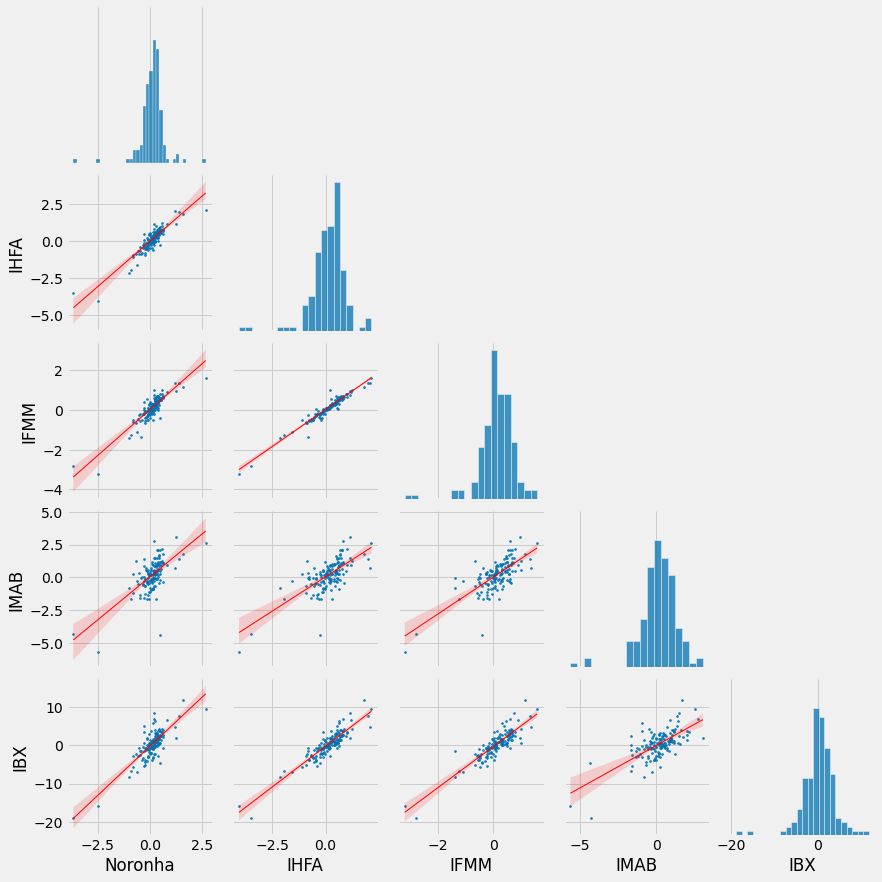

In [57]:
# Visualize the data using scatter plot and histogram

#sns.set_palette('colorblind')
sns.pairplot(data=data,kind="reg",plot_kws={'line_kws':{'color':'red','lw':1},'scatter_kws': {'s': 3}},corner= True,)

In [68]:
import statsmodels.api as sm

# Set independent and dependent variables
X = data[['IBX', 'IMAB']]
y = data['IFMM']

#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFMM   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     284.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           7.76e-50
Time:                        15:49:39   Log-Likelihood:                -17.396
No. Observations:                 142   AIC:                             40.79
Df Residuals:                     139   BIC:                             49.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0612      0.023      2.607      0.0

In [60]:
print(model.ssr)19132

12.191389656969445


In [70]:
# Set independent and dependent variables
X = data[['IBX', 'IMAB']]
y = data['IHFA']

#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   IHFA   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     357.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           1.68e-55
Time:                        15:51:33   Log-Likelihood:                -41.773
No. Observations:                 142   AIC:                             89.55
Df Residuals:                     139   BIC:                             98.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0644      0.028      2.311      0.0

In [71]:
print(model.ssr)

14.973779314765675


In [72]:
# Set independent and dependent variables
X = data[['IBX', 'IFMM']]
y = data['IHFA']

#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   IHFA   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1346.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           1.08e-91
Time:                        15:52:45   Log-Likelihood:                 43.357
No. Observations:                 142   AIC:                            -80.71
Df Residuals:                     139   BIC:                            -71.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.016      0.196      0.8

In [73]:
print(model.ssr)

4.514460140010603


In [80]:
#Multual Information(Entropia)
from sklearn import feature_selection
feature_selection.mutual_info_regression(data['IBX'].values.reshape((-1, 1)),data['IHFA'])

array([0.79752764])

In [81]:
#Multual Information(Entropia)
feature_selection.mutual_info_regression(data['IBX'].values.reshape((-1, 1)),data['IFMM'])

array([0.61565459])

In [82]:
feature_selection.mutual_info_regression(data['IBX'].values.reshape((-1, 1)),data['Noronha'])

array([0.40587101])

In [85]:
feature_selection.mutual_info_regression(data['IMAB'].values.reshape((-1, 1)),data['Noronha'])

array([0.24317435])

In [86]:
feature_selection.mutual_info_regression(data['IMAB'].values.reshape((-1, 1)),data['IFMM'])

array([0.28055747])

In [87]:
feature_selection.mutual_info_regression(data['IMAB'].values.reshape((-1, 1)),data['IHFA'])

array([0.24031477])

In [11]:
# Set independent and dependent variables
X = data[['IBX']]
y = data['IHFA']

#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   IHFA   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     655.5
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.13e-54
Time:                        11:39:36   Log-Likelihood:                -47.270
No. Observations:                 142   AIC:                             98.54
Df Residuals:                     140   BIC:                             104.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0773      0.029      2.704      0.0

In [12]:
print(model.ssr)

16.179172188319246


In [13]:
# Set independent and dependent variables
X = data[['IBX']]
y = data['IFMM']

#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFMM   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     480.8
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           4.05e-47
Time:                        11:40:38   Log-Likelihood:                -27.177
No. Observations:                 142   AIC:                             58.35
Df Residuals:                     140   BIC:                             64.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0759      0.025      3.058      0.0

In [14]:
print(model.ssr)

12.191389656969445


In [20]:
# Set independent and dependent variables
X = data[['IMAB']]
y = data['IHFA']

#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   IHFA   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     142.4
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           4.42e-23
Time:                        11:53:15   Log-Likelihood:                -120.81
No. Observations:                 142   AIC:                             245.6
Df Residuals:                     140   BIC:                             251.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0411      0.048      0.850      0.3

In [21]:
print(model.ssr)

45.57956531580637


In [18]:
# Set independent and dependent variables
X = data[['IMAB']]
y = data['IFMM']

#add constant to predictor variables
x = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   IFMM   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     160.9
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           4.98e-25
Time:                        11:48:24   Log-Likelihood:                -78.583
No. Observations:                 142   AIC:                             161.2
Df Residuals:                     140   BIC:                             167.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0451      0.036      1.256      0.2

In [19]:
print(model.ssr)

25.147360170348552


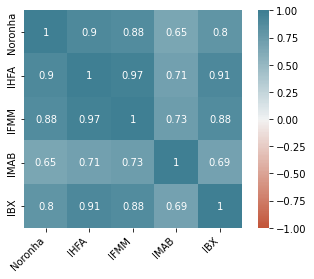

In [4]:
corr = data.corr()
ax = sns.heatmap(
    corr,
    annot=True, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# calculating VIF for each feature
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

In [10]:
vif_data

,feature,VIF
0,Noronha,5.521587
1,IHFA,24.884940
2,IFMM,17.417030
3,IMAB,2.250084
4,IBX,5.718954
